In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("C:\\Users\\HEMANTH\\Desktop\\dataset\\fraud_dataset.csv")
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0
823,0,0,1,1,1,8596,0,162,360,1,1,2,0
824,1,0,1,1,1,3664,0,109,215,1,1,1,0
825,1,0,2,1,0,4921,0,162,360,0,1,2,0


In [6]:
data.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

In [7]:
data["Totalincome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [8]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk,Totalincome
0,1,0,0,1,0,5849,0,146,360,1,1,1,0,5849
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1,6091
2,1,1,0,1,1,3000,0,66,360,1,1,1,1,3000
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1,4941
4,1,0,0,1,0,6000,0,141,360,1,1,1,0,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0,4428
823,0,0,1,1,1,8596,0,162,360,1,1,2,0,8596
824,1,0,1,1,1,3664,0,109,215,1,1,1,0,3664
825,1,0,2,1,0,4921,0,162,360,0,1,2,0,4921


<AxesSubplot:>

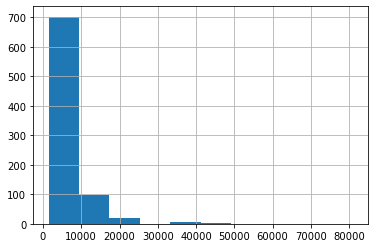

In [10]:
import matplotlib as plt
data['Totalincome'].hist()

<AxesSubplot:>

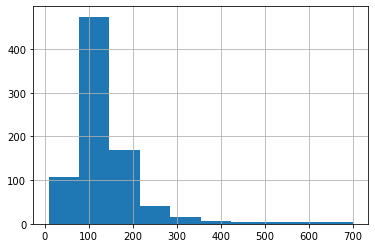

In [11]:
data['LoanAmount'].hist()

<AxesSubplot:>

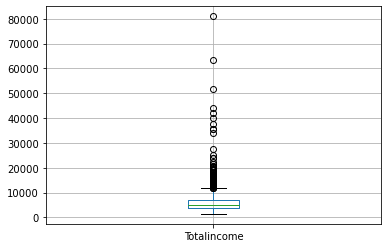

In [12]:
data.boxplot(column='Totalincome')

<AxesSubplot:title={'center':'Totalincome'}, xlabel='Education'>

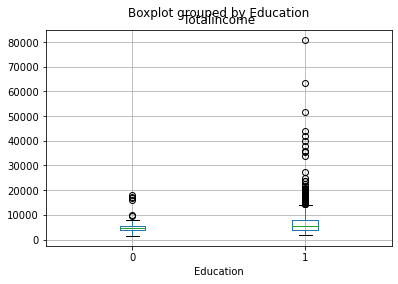

In [15]:
data.boxplot(column='Totalincome',by='Education')

In [17]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term',
       'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk',
       'Totalincome'],
      dtype='object')

In [30]:
X=data.loc[:,['Gender','Education','Self_Employed','LoanAmount','Loan_Term','Credit_History_Available','Totalincome']]

In [31]:
X

,Gender,Education,Self_Employed,LoanAmount,Loan_Term,Credit_History_Available,Totalincome
0,1,1,0,146,360,1,5849
1,1,1,1,128,360,1,6091
2,1,1,1,66,360,1,3000
3,1,0,1,120,360,1,4941
4,1,1,0,141,360,1,6000
...,...,...,...,...,...,...,...
822,0,1,0,91,360,1,4428
823,0,1,1,162,360,1,8596
824,1,1,1,109,215,1,3664
825,1,1,0,162,360,0,4921


In [32]:
y=data["Fraud_Risk"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
pred=model.predict(X_test)

In [40]:
pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8795180722891566

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        66
           1       0.88      0.93      0.90       100

    accuracy                           0.88       166
   macro avg       0.88      0.87      0.87       166
weighted avg       0.88      0.88      0.88       166



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[53, 13],
       [ 7, 93]], dtype=int64)